In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si
import math

In [2]:
def FACT(x):
    FACT = math.factorial(x)
    return(FACT)

In [3]:
AssetValue = 3118.742
RiskFree = 0.0019
volatility = 0.38927653829896
Maturity = 1.0
NumMovments = 52

In [4]:
Stepsize = Maturity/NumMovments
a = np.exp(RiskFree*Stepsize)
UpSize = np.exp(volatility*np.sqrt(Stepsize))
DownSize = np.exp(-volatility*np.sqrt(Stepsize))
UpProb = (a-DownSize)/(UpSize-DownSize)
DownProb = 1-UpProb

In [5]:
bench = np.arange(1,(NumMovments+1))
len(bench)

52

In [6]:
up = np.ones(NumMovments)*UpProb
up 

array([0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581, 0.48684581, 0.48684581, 0.48684581,
       0.48684581, 0.48684581])

In [7]:
down = np.ones(NumMovments)*DownProb
down 

array([0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419, 0.51315419, 0.51315419, 0.51315419,
       0.51315419, 0.51315419])

In [8]:
move = np.ones(NumMovments)*NumMovments
move

array([52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
       52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
       52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.,
       52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52., 52.])

In [9]:
num_up_mov = np.arange(1,(NumMovments+1))
len(num_up_mov)

52

In [10]:
num_down_mov = np.arange(0,NumMovments)[ : :-1]
len(num_down_mov)

52

In [11]:
FA = []
for i in range(0,len(bench)):
    FA.append(int((AssetValue*(UpSize**num_up_mov[i])*(DownSize**num_down_mov[i]))))

In [12]:
Prob = []
for i in range(0,len(bench)):
    Prob.append((FACT(NumMovments)/(FACT(num_up_mov[i])*FACT(num_down_mov[i])))*(UpProb**num_up_mov[i])*(DownProb**num_down_mov[i]))

In [13]:
Prob1 = []
for i in range(0,len(bench)):
    Prob1.append("{:.5%}".format(Prob[i]))

In [14]:
WFA = []
for i in range(0,len(bench)):
    WFA.append(int((Prob[i]*FA[i])))

In [15]:
df = pd.DataFrame({"Bench": bench,
                   "Weekly Up Probability": up,
                   "Weekly Down Probability": down,
                   "Number of Movments": move,
                   "Number of Up Movments": num_up_mov,
                   "Number of Down Movments": num_down_mov,
                   "Future Value": FA,
                   "Probability to Value": Prob1,
                   "Weighted Future Value": WFA})
df

,Bench,Weekly Up Probability,Weekly Down Probability,Number of Movments,Number of Up Movments,Number of Down Movments,Future Value,Probability to Value,Weighted Future Value
0,1,0.486846,0.513154,52.0,1,51,209,0.00000%,0
1,2,0.486846,0.513154,52.0,2,50,233,0.00000%,0
2,3,0.486846,0.513154,52.0,3,49,260,0.00000%,0
3,4,0.486846,0.513154,52.0,4,48,290,0.00000%,0
4,5,0.486846,0.513154,52.0,5,47,323,0.00000%,0
5,6,0.486846,0.513154,52.0,6,46,359,0.00000%,0
6,7,0.486846,0.513154,52.0,7,45,400,0.00001%,0
7,8,0.486846,0.513154,52.0,8,44,446,0.00004%,0
8,9,0.486846,0.513154,52.0,9,43,497,0.00020%,0
9,10,0.486846,0.513154,52.0,10,42,554,0.00080%,0


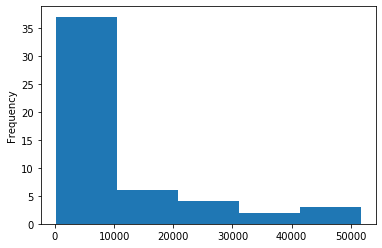

In [16]:
df['Future Value'].plot.hist(bins=5)

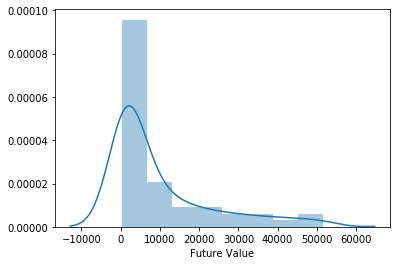

In [17]:
import seaborn as sb
sb.distplot(df['Future Value'])